###  HIPÓTESIS 3
#### "La duración ideal para obtener una alta valoración está entre 90 y 120 minutos"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargamos el data de TMDb
tmdb_df= pd.read_csv('dataF/tmdb_5000_movies.csv')
tmdb_df

In [4]:
# Mostramos la información básica de este dataframe
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
# Creamos un nuevo DataFrame solo con las columnas necesarias
tiempo_valoración_df = tmdb_df[['runtime', 'vote_average']]

# Mostramos información básica del nuevo DataFrame
tiempo_valoración_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   runtime       4801 non-null   float64
 1   vote_average  4803 non-null   float64
dtypes: float64(2)
memory usage: 75.2 KB


In [7]:
tiempo_valoración_df

,runtime,vote_average
0,162.0,7.2
1,169.0,6.9
2,148.0,6.3
3,165.0,7.6
4,132.0,6.1
...,...,...
4798,81.0,6.6
4799,85.0,5.9
4800,120.0,7.0
4801,98.0,5.7


In [10]:
# 1. Eliminamos las 2 filas con runtime nulo
tiempo_valoración_df = tiempo_valoración_df.dropna(subset=['runtime'])

# 2. Eliminamos filas donde runtime sea igual a 0
tiempo_valoración_df = tiempo_valoración_df[tiempo_valoración_df['runtime'] != 0]

# 3. Como sabemos que no hay NaN, eliminamos sólo las filas donde vote_average sea igual a 0
tiempo_valoración_df = tiempo_valoración_df[tiempo_valoración_df['vote_average'] != 0]

# Mostramos información básica del nuevo DataFrame
tiempo_valoración_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4716 entries, 0 to 4802
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   runtime       4716 non-null   float64
 1   vote_average  4716 non-null   float64
dtypes: float64(2)
memory usage: 110.5 KB


In [12]:
# Renombramos las columnas a español
tiempo_valoración_df = tiempo_valoración_df.rename(columns={
    'runtime': 'duración',
    'vote_average': 'valoración_media'
})

tiempo_valoración_df.head()


,duración,valoración_media
0,162.0,7.2
1,169.0,6.9
2,148.0,6.3
3,165.0,7.6
4,132.0,6.1


In [16]:
# Nueva función para clasificar en 4 grupos
def clasificar_duración(minutos):
    if minutos < 60:
        return 'Muy corta'
    elif 60 <= minutos < 90:
        return 'Corta'
    elif 90 <= minutos <= 120:
        return 'Media'
    else:
        return 'Larga'

# Aplicamos la función al DataFrame
tiempo_valoración_df['grupo_duración'] = tiempo_valoración_df['duración'].apply(clasificar_duración)

# Ver algunas filas para revisar que se asignó correctamente
print(tiempo_valoración_df[['duración', 'grupo_duración']].head(10))

# Contar cuántas películas hay por grupo
tiempo_valoración_df['grupo_duración'].value_counts()


   duración grupo_duración
0     162.0          Larga
1     169.0          Larga
2     148.0          Larga
3     165.0          Larga
4     132.0          Larga
5     139.0          Larga
6     100.0          Media
7     141.0          Larga
8     153.0          Larga
9     151.0          Larga


grupo_duración
Media        3080
Larga         985
Corta         643
Muy corta       8
Name: count, dtype: int64

### observación 

### 📊 Cantidad de películas por grupo:

| Grupo     | Número de películas |
| --------- | ------------------- |
| Muy corta | **8**               |
| Corta     | 643                 |
| Media     | 3080                |
| Larga     | 985                 |


### ⚠️ es un problema tener solo 8 películas en "Muy corta"

Porque cuando un grupo tiene muy pocos datos:

* **La media puede no ser representativa**.
* Puede haber **mucha variabilidad** (basta que una película tenga una valoración muy alta o muy baja para afectar mucho la media).
* **No se pueden sacar conclusiones fiables** sobre ese grupo.
* **La comparación con otros grupos pierde sentido**, porque no estamos comparando volúmenes similares.



#### 🟢 Opción : 

Simplemente lo excluimos para que no distorsione la comparación entre grupos más equilibrados.


In [17]:
# Creamos un nuevo DataFrame excluyendo el grupo 'Muy corta'
tiempo_valoración_filtrado = tiempo_valoración_df[tiempo_valoración_df['grupo_duración'] != 'Muy corta']

# Contamos cuántas películas hay en cada grupo después de eliminar 'Muy corta'
tiempo_valoración_filtrado['grupo_duración'].value_counts()


grupo_duración
Media    3080
Larga     985
Corta     643
Name: count, dtype: int64

In [18]:
# Calculamos la valoración media de cada grupo
medias_por_grupo = tiempo_valoración_filtrado.groupby('grupo_duración')['valoración_media'].mean()

# Mostramos los resultados
print(medias_por_grupo)


grupo_duración
Corta    5.677605
Larga    6.748325
Media    6.098247
Name: valoración_media, dtype: float64




### ✅ RESULTADOS DE LA VALORACIÓN MEDIA POR GRUPO

| Grupo de duración | Valoración media |
| ----------------- | ---------------- |
| **Corta**         | 5.68             |
| **Media**         | 6.10             |
| **Larga**         | **6.75**         |

(Valores redondeados a dos decimales para facilitar la comparación)



### ❓ ¿Se cumple la hipótesis?

La **hipótesis decía**:

> *"La duración ideal para obtener una alta valoración está entre 90 y 120 minutos."*

Ese rango corresponde al grupo **"Media"**.



### ❌ Conclusión:

**La hipótesis no se cumple.**
El grupo con **mayor valoración media** es el de películas **largas** (más de 120 minutos), con una nota media de **6.75**.



### 🧠 Análisis adicional:

* Las películas **cortas (< 90 min)** tienen la **valoración más baja**.
* Las **medias (90–120 min)** están en el medio, con **6.10**.
* Las **largas (>120 min)** son las que más gustan al público en general, según esta métrica.



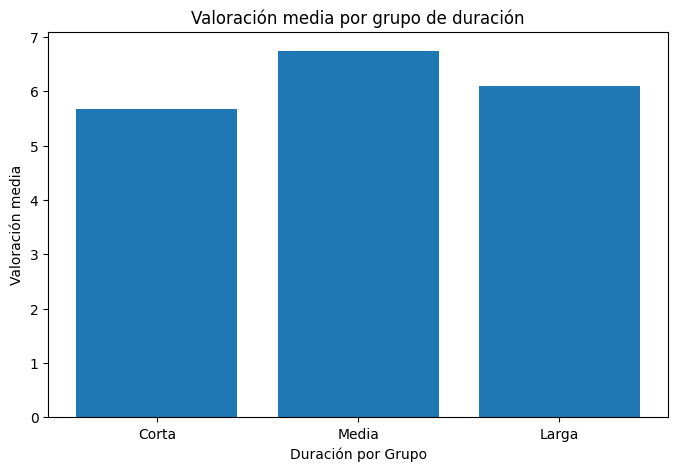

In [21]:
# Ordenamos la serie de medias de menor a mayor
medias_ordenadas = medias_por_grupo.sort_values()
# Configuramos los datos para el gráfico
grupos = medias_ordenadas.index
valoraciones = medias_por_grupo.values

# Creamos la gráfica de barras
plt.figure(figsize=(8, 5))  # Tamaño del gráfico
plt.bar(grupos, valoraciones)

# Añadimos títulos y etiquetas
plt.title('Valoración media por grupo de duración')
plt.xlabel('Duración por Grupo')
plt.ylabel('Valoración media')

# Mostramos el gráfico
plt.show()


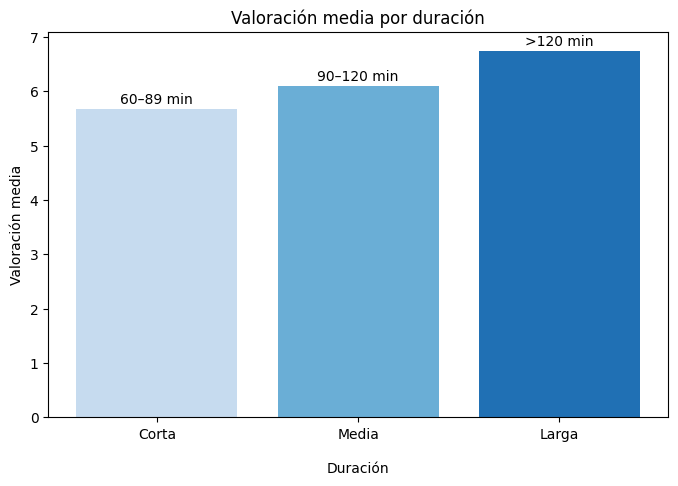

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colores en gradación azul: más claro para "Corta", más oscuro para "Larga"
colores_azules = sns.color_palette("Blues", n_colors=3)

# Ordenamos las medias
medias_ordenadas = medias_por_grupo.sort_values()
grupos = medias_ordenadas.index
valoraciones = medias_ordenadas.values

# Creamos el gráfico
plt.figure(figsize=(8, 5))
barras = plt.bar(grupos, valoraciones, color=colores_azules)

# Títulos y etiquetas
plt.title('Valoración media por duración')
plt.xlabel('Duración', labelpad=15)
plt.ylabel('Valoración media')

# Diccionario de etiquetas de duración
duraciones = {
    'Corta': '60-89 min',
    'Media': '90-120 min',
    'Larga': '>120 min'
}

# Etiquetas de duración encima de cada barra
for i, barra in enumerate(barras):
    altura = barra.get_height()
    grupo = grupos[i]
    texto = duraciones[grupo]
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.1, texto,
             ha='center', fontsize=10)

# Mostrar gráfico
plt.show()


C:\Users\eth-0\AppData\Local\Temp\ipykernel_12452\3982584588.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='grupo_duración', y='valoración_media',


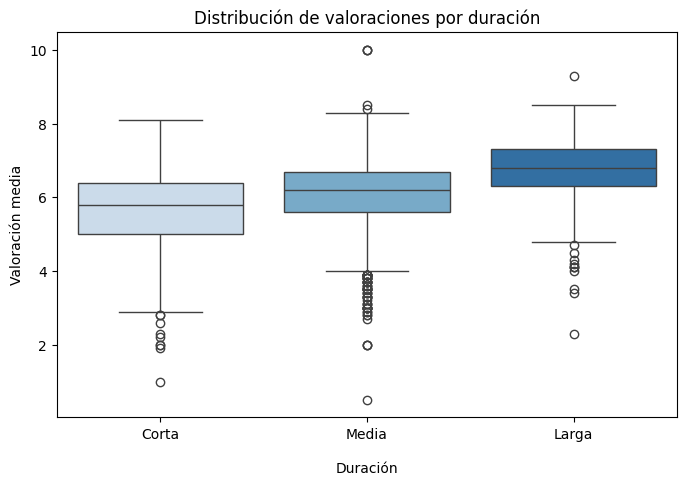

In [33]:
import seaborn as sns

# Usamos 3 tonos progresivos de azul (del más claro al más oscuro)
colores_azules = sns.color_palette("Blues", n_colors=3)

# Creamos el boxplot con esa gradación
plt.figure(figsize=(8, 5))
sns.boxplot(x='grupo_duración', y='valoración_media',
            data=tiempo_valoración_filtrado,
            order=['Corta', 'Media', 'Larga'],
            palette=colores_azules)

# Títulos y etiquetas
plt.title('Distribución de valoraciones por duración')
plt.xlabel('Duración', labelpad=15)
plt.ylabel('Valoración media')

# Mostramos el gráfico
plt.show()



### 📊 **Distribución de valoraciones por duración**

Cada **caja** representa cómo están distribuidas las valoraciones dentro de cada grupo (`Corta`, `Media`, `Larga`):


### ✅ 1. **Línea dentro de la caja (la mediana)**:

* Es la **valoración central** del grupo, ordenando todas las películas de menor a mayor valoración.
* **Grupo Larga** tiene la mediana más alta, seguida de Media, y luego Corta.



### ✅ 2. **Caja azul (rango intercuartílico – 50% central de los datos)**:

* Contiene la mitad de las películas con valoraciones más cercanas entre sí.
* Si la caja es **más alta**, hay más variabilidad en las valoraciones.
* Si la caja es **más baja**, las películas del grupo están más de acuerdo en su puntuación.


### ✅ 3. **"Bigotes" o líneas exteriores**:

* Muestran el rango de los datos que no se consideran outliers.
* **Límites máximos y mínimos normales**.



### ✅ 4. **Puntos fuera de la caja (outliers)**:

* Películas con valoraciones **atípicamente bajas o altas**.
* Por ejemplo:

  * En **Media**, hay películas con nota **10** (máxima).
  * En **Corta**, hay muchas con notas **por debajo de 3**, algunas cerca de **1**.


### 📌 Interpretación general:

| Grupo     | Mediana  | Rango típico           | Outliers notables                 |
| --------- | -------- | ---------------------- | --------------------------------- |
| **Corta** | Más baja | Más disperso           | Muchos con valoración muy baja    |
| **Media** | Media    | Razonablemente estable | Algunos 10, varios <4             |
| **Larga** | Más alta | Más concentrado        | Menos extremos negativos, más 7–9 |



### 🎯 Conclusión visual:

* **Larga** no solo tiene **la mayor media**, sino también **menos valoraciones extremadamente bajas**, lo que la hace más "segura" en general.
* **Corta** tiene **la media y la mediana más bajas**, y **más dispersión negativa**.
* **Media** tiene resultados **más variados**, pero en general **mejores que Corta**.


### ❌ Conclusión Hipótesis:
La hipótesis no se cumple: las películas de duración media no son las más valoradas.

Las películas largas (>120 minutos) tienen la mejor valoración media.

El boxplot también muestra que las películas largas tienen menos valoraciones extremadamente bajas.

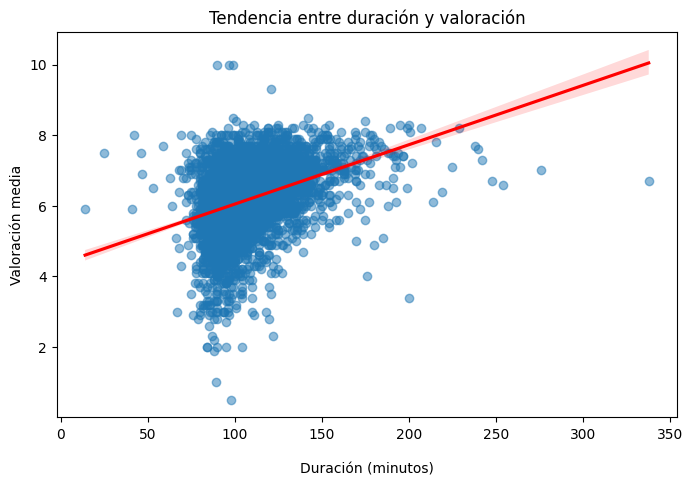

In [35]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.regplot(x='duración', y='valoración_media', data=tiempo_valoración_df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Tendencia entre duración y valoración')
plt.xlabel('Duración (minutos)', labelpad=15)
plt.ylabel('Valoración media')
plt.show()
